In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt

# Compile all models

In [4]:
model_1 = CmdStanModel(stan_file = 'stanfiles/code_1.stan')
model_2 = CmdStanModel(stan_file = 'stanfiles/code_2.stan')
model_3 = CmdStanModel(stan_file = 'stanfiles/code_3.stan')
model_4 = CmdStanModel(stan_file = 'stanfiles/code_4.stan')
model_5 = CmdStanModel(stan_file = 'stanfiles/code_5.stan')


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


# Params

In [5]:
F = len("Jakub")
L = len("Burczyk")
N = (F+L)*100
data = dict(N=N)

# Ex1

In [7]:
result_1 = model_1.sample(data = data, fixed_param = True)
result_2 = model_2.sample(data = data, fixed_param=True)

y1 = result_1.stan_variable('y')
x2 = result_2.stan_variable('X')

data_y1 = dict(N = N, y = y1[0])

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:05 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


# Ex2

In [10]:
result_3 = model_3.sample(data = data_y1, fixed_param=True)
result_4 = model_3.sample(data = data_y1, fixed_param=True)


data_3_4 = dict(model_3 = result_3, model_4 = result_4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance

         rank         loo  p_loo     d_loo    weight          se         dse  \
model_4     0 -2872.58455    0.0   0.00000  0.999512  452.239750    0.000000   
model_3     1 -2884.35183    0.0  11.76728  0.000488   62.390259  389.857718   

         warning loo_scale  
model_4     True       log  
model_3     True       log  


<AxesSubplot:xlabel='Log'>

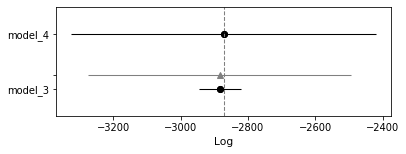

In [11]:
comp_loo = az.compare(data_3_4, ic = "loo")
print(comp_loo)
az.plot_compare(comp_loo)

C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


         rank        waic        p_waic    d_waic    weight          se  \
model_4     0 -2872.58455  1.928504e-23   0.00000  0.999512  452.239750   
model_3     1 -2884.35183  1.630030e-24  11.76728  0.000488   62.390259   

                dse  warning waic_scale  
model_4    0.000000    False        log  
model_3  389.857718    False        log  


<AxesSubplot:xlabel='Log'>

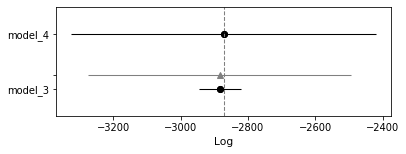

In [12]:
comp_waic = az.compare(data_3_4, ic = 'waic')
print(comp_waic)
az.plot_compare(comp_waic)

# Ex3

In [13]:
data_5_1 = dict(N = N, K = 1, y = y1[0], X = x2[0,:,0:1])
result_5_1 = model_5.sample(data = data_5_1, fixed_param = True)

data_5_2 = dict(N = N, K = 2, y = y1[0], X = x2[0,:,0:2])
result_5_2 = model_5.sample(data = data_5_2, fixed_param = True)

data_5_3 = dict(N = N, K = 3, y = y1[0], X = x2[0,:,0:3])
result_5_3 = model_5.sample(data = data_5_3, fixed_param = True)

data_5 = dict(model_5_1 = result_5_1, model_5_2 = result_5_2, model_5_3 = result_5_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:03 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance



           rank         loo  p_loo      d_loo    weight          se  \
model_5_3     0 -3114.24652    0.0    0.00000  0.917754  260.969205   
model_5_2     1 -3318.30418    0.0  204.05766  0.071643   23.388044   
model_5_1     2 -3517.69193    0.0  403.44541  0.010603   13.754161   

                  dse  warning loo_scale  
model_5_3    0.000000     True       log  
model_5_2  238.519325     True       log  
model_5_1  247.538264     True       log  


<AxesSubplot:xlabel='Log'>

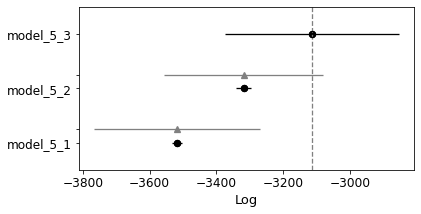

In [14]:

comp_loo_5 = az.compare(data_5, ic = "loo")
print('\n')
print(comp_loo_5)
az.plot_compare(comp_loo_5)

C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\anaconda3\envs\cmdstan\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])




           rank        waic        p_waic     d_waic    weight          se  \
model_5_3     0 -3114.24652  1.866523e-23    0.00000  0.917754  260.969205   
model_5_2     1 -3318.30418  1.671366e-24  204.05766  0.071643   23.388044   
model_5_1     2 -3517.69193  1.849190e-24  403.44541  0.010603   13.754161   

                  dse  warning waic_scale  
model_5_3    0.000000    False        log  
model_5_2  238.519325    False        log  
model_5_1  247.538264    False        log  


<AxesSubplot:xlabel='Log'>

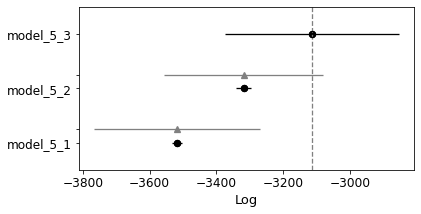

In [15]:
comp_waic_5 = az.compare(data_5, ic = "waic")
print('\n')
print(comp_waic_5)
az.plot_compare(comp_waic_5)